In [98]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [99]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

28502.82s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


File ‘spam.csv’ already there; not retrieving.



In [100]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [101]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)


In [102]:
df.columns = ['labels', 'data']
df['data'] = df['data'].str.lower()
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
df.head()
df_train, df_test = train_test_split(df, test_size=0.33)
df_train.shape,df_test.shape

((3733, 3), (1839, 3))

In [103]:
pattern = r'(\W+)'
data = df['data'].to_string(index= False)
data = re.split(pattern, data)
print(data[40:100])
for i in range(len(data)):
  data[i] = re.sub(' *|\n', '', data[i])
print(data[40:100])

['comp', ' ', 'to', ' ', 'win', ' ', 'fa', ' ', 'cup', ' ', 'final', '...\n ', 'u', ' ', 'dun', ' ', 'say', ' ', 'so', ' ', 'early', ' ', 'hor', '... ', 'u', ' ', 'c', ' ', 'already', ' ', 'then', ' ', 'say', '...\n', 'nah', ' ', 'i', ' ', 'don', "'", 't', ' ', 'think', ' ', 'he', ' ', 'goes', ' ', 'to', ' ', 'usf', ', ', 'he', ' ', 'lives', ' ', 'arou', '...\n', 'freemsg', ' ']
['comp', '', 'to', '', 'win', '', 'fa', '', 'cup', '', 'final', '...', 'u', '', 'dun', '', 'say', '', 'so', '', 'early', '', 'hor', '...', 'u', '', 'c', '', 'already', '', 'then', '', 'say', '...', 'nah', '', 'i', '', 'don', "'", 't', '', 'think', '', 'he', '', 'goes', '', 'to', '', 'usf', ',', 'he', '', 'lives', '', 'arou', '...', 'freemsg', '']


In [104]:
setOfwords = set(data)
setOfwords.remove('')
# 0 = padding

idx = 1
word2idx = { '<PAD>': 0 }

for i in setOfwords:
  word2idx[i] = idx
  idx+=1




In [105]:
train_sentences_as_int = []
for i, row in df_train.iterrows():
  tokens = re.split(pattern, row['data'])
  tokens = [re.sub(' *|\n', '',i) for i in tokens]
  tokens = filter(lambda x : x != '', tokens)
  sentence_as_int = [word2idx[token] for token in tokens if token in word2idx]
  train_sentences_as_int.append(sentence_as_int)


test_sentences_as_int = []
for i, row in df_test.iterrows():
  tokens = re.split(pattern, row['data'])
  tokens = [re.sub(' *|\n', '',i) for i in tokens]
  tokens = filter(lambda x : x != '', tokens)
  sentence_as_int = [word2idx[token] for token in tokens if token in word2idx]
  test_sentences_as_int.append(sentence_as_int)

In [106]:
def data_generator(X, y, batch_size = 32):
  X, y = shuffle(X,y)
  n_batches = int(np.ceil(len(y) / batch_size))
  for i in range(n_batches):
    end = min((i+1)* batch_size, len(y))
    X_batch = X[i*batch_size:end]
    y_batch = y[i*batch_size:end]
    max_len = np.max([len(x) for x in X_batch])
    for j in range(len(X_batch)):
      x = X_batch[j]
      pad = [0] * (max_len - len(x))
      X_batch[j] = pad + x

    X_batch = torch.from_numpy(np.asarray(X_batch)).long()
    y_batch = torch.from_numpy(np.asarray(y_batch)).long()
    yield X_batch, y_batch

In [107]:
for inputs, targets in data_generator(train_sentences_as_int, df_train.b_labels):
  print('inputs', inputs, 'shape:', inputs.shape)
  print( 'targets', targets, 'shape:', targets.shape)
  break
for inputs, targets in data_generator(test_sentences_as_int, df_test.b_labels):
  print('inputs', inputs, 'shape:', inputs.shape)
  print( 'targets', targets, 'shape:', targets.shape)
  break

inputs tensor([[   0,    0,    0,  ..., 2323,  584, 1000],
        [   0,    0,    0,  ...,  586, 1687,  871],
        [   0,    0,    0,  ..., 5362, 5887, 1885],
        ...,
        [   0,    0,    0,  ...,   32, 5836, 2311],
        [   0,    0,    0,  ..., 3092, 4348, 1885],
        [   0,    0,    0,  ..., 4930, 2371, 1885]]) shape: torch.Size([32, 66])
targets tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 1]) shape: torch.Size([32])
inputs tensor([[   0,    0,    0,  ..., 5748, 3862, 4086],
        [   0,    0,    0,  ..., 1734, 5818, 2271],
        [   0,    0,    0,  ...,  489, 1831, 1885],
        ...,
        [   0,    0,    0,  ..., 3553, 4957, 3341],
        [   0,    0,    0,  ..., 1885, 5068, 5840],
        [   0,    0,    0,  ..., 1887,  586,  398]]) shape: torch.Size([32, 40])
targets tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 0]) shape: torch

/tmp/ipykernel_43139/456560955.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_batch = y[i*batch_size:end]


In [108]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [109]:
class RNN(nn.Module):
  def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs):
    super(RNN, self).__init__()
    self.V =  n_vocab
    self.D = embed_dim
    self.M = n_hidden
    self.K = n_outputs
    self.L = n_rnnlayers
    
    self.embed = nn.Embedding(self.V, self.D)
    self.rnn = nn.LSTM(
      input_size = self.D,
      hidden_size = self.M,
      num_layers = self.L,
      batch_first = True
    )
    self.fc = nn.Linear(self.M, self.K)

  def forward(self, X):
    h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    c0 = torch.zeros(self.L, X.size(0), self.M).to(device)

    out = self.embed(X)

    out, _ = self.rnn(out, (h0,c0))
    out, _ = torch.max(out, 1)
    
    out = self.fc(out)

    return out


In [110]:
model =  RNN(len(word2idx), 20, 15, 1, 1)
model.to(device)

RNN(
  (embed): Embedding(5977, 20)
  (rnn): LSTM(20, 15, batch_first=True)
  (fc): Linear(in_features=15, out_features=1, bias=True)
)

In [111]:
criterion = nn.BCEWithLogitsLoss()
optimizer =  torch.optim.Adam(model.parameters())

In [112]:
train_gen = lambda: data_generator(train_sentences_as_int, df_train.b_labels)
test_gen = lambda: data_generator(test_sentences_as_int, df_test.b_labels)

In [113]:
def batch_gd(model, criterion, optimizer, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_gen():
      targets = targets.view(-1,1).float()
      inputs, targets = inputs.to(device), targets.to(device)
      optimizer.zero_grad()
      outputs =  model(inputs)
      loss = criterion(outputs, targets)

      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    train_loss =  np.mean(train_loss)

    test_loss = []
    for inputs, targets in test_gen():
      inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.view(-1,1).float()
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())

    test_loss = np.mean(test_loss)

    train_losses[it] = train_loss
    test_losses[it] = test_loss
    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Duration: {dt}')

  return train_losses, test_losses

In [114]:
train_losses, test_losses =  batch_gd(model, criterion, optimizer, 15)

/tmp/ipykernel_43139/456560955.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_batch = y[i*batch_size:end]


Epoch 1/15, Train Loss: 0.4178, Test Loss: 0.3665, Duration: 0:00:04.676340
Epoch 2/15, Train Loss: 0.2996, Test Loss: 0.2615, Duration: 0:00:04.154348
Epoch 3/15, Train Loss: 0.2003, Test Loss: 0.1657, Duration: 0:00:04.320499
Epoch 4/15, Train Loss: 0.1312, Test Loss: 0.1218, Duration: 0:00:04.333300
Epoch 5/15, Train Loss: 0.0984, Test Loss: 0.1026, Duration: 0:00:04.329181
Epoch 6/15, Train Loss: 0.0794, Test Loss: 0.0897, Duration: 0:00:04.300836
Epoch 7/15, Train Loss: 0.0650, Test Loss: 0.0833, Duration: 0:00:04.363575
Epoch 8/15, Train Loss: 0.0579, Test Loss: 0.0770, Duration: 0:00:04.278485
Epoch 9/15, Train Loss: 0.0496, Test Loss: 0.0744, Duration: 0:00:05.185136
Epoch 10/15, Train Loss: 0.0436, Test Loss: 0.0690, Duration: 0:00:05.076935
Epoch 11/15, Train Loss: 0.0375, Test Loss: 0.0710, Duration: 0:00:04.612682
Epoch 12/15, Train Loss: 0.0324, Test Loss: 0.0691, Duration: 0:00:04.268443
Epoch 13/15, Train Loss: 0.0289, Test Loss: 0.0705, Duration: 0:00:04.498648
Epoch 14

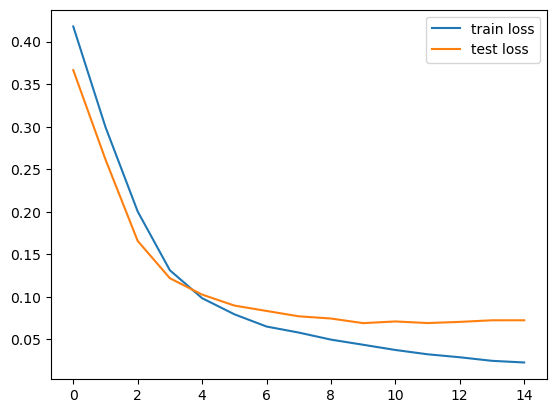

In [115]:
plt.plot(train_losses, label ='train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.show()

In [116]:
n_correct= 0
n_total = 0

for inputs, targets in train_gen():
  targets = targets.view(-1, 1).float()
  inputs, targets =  inputs.to(device), targets.to(device)

  outputs = model(inputs)
  
  predictions = (outputs > 0)

  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct/n_total
for inputs, targets in test_gen():
  targets = targets.view(-1, 1).float()
  inputs, targets =  inputs.to(device), targets.to(device)

  outputs = model(inputs)
  
  predictions = (outputs > 0)

  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct/n_total
print(f'Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}')

/tmp/ipykernel_43139/456560955.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_batch = y[i*batch_size:end]


Train acc: 0.9960, Test acc: 0.9899
